# 🌸 Day 12 - Iris Flower Classification using SHAP
### Interpreting Machine Learning Models using SHAP Values (Explainable ML on Iris Dataset)

A machine learning project that classifies Iris flower species using a Random Forest model and explains its predictions through SHAP-based interpretability.

---

## 1. Introduction  

This project, **Interpreting Machine Learning Models using SHAP Values 🧩**, focuses on building an explainable machine learning model using the classic **Iris dataset**.  
The goal is not only to achieve high classification accuracy but also to understand *why* the model makes certain predictions.  
By leveraging the **SHAP (SHapley Additive exPlanations)** framework, the project demonstrates both global and local interpretability of a **Random Forest Classifier**, providing valuable insights into feature influence on predictions.


---

## 2. Project Objectives  

- To build a robust **Random Forest classification model** for predicting Iris flower species.  
- To apply **SHAP** for explaining model predictions at both global (overall) and local (individual) levels.  
- To visualize feature importance and relationships using **summary, bar, and waterfall plots**.  
- To enhance model transparency and interpretability, supporting the principles of **Explainable AI (XAI)**.  


---

## 3. Dataset Overview  

- **Dataset Name:** Iris Dataset (Fisher, 1936)  
- **Source:** Scikit-learn / UCI Machine Learning Repository  
- **Features:** 4 numerical features — *sepal length (cm)*, *sepal width (cm)*, *petal length (cm)*, *petal width (cm)*  
- **Target Variable:** Flower species — *Setosa*, *Versicolor*, *Virginica*  
- **Type:** Multiclass classification (3 classes, 150 samples)


---

## 4. Methodology and Approach  

1. **Data Loading & Exploration:** Examined dataset structure, summary statistics, and feature relationships through EDA.  
2. **Data Preprocessing:** Handled label mapping, feature scaling, and train-test split to prepare data for modeling.  
3. **Model Building:** Trained a **Random Forest Classifier** with 200 estimators to capture non-linear feature relationships.  
4. **Model Evaluation:** Assessed performance using accuracy, classification report, confusion matrix, and cross-validation.  
5. **Explainability using SHAP:**  
   - Generated **summary and bar plots** for global feature importance.  
   - Produced **waterfall plots** for local (instance-level) explanations.  


---

## 5. Tools and Libraries Used  

- **Python 3.10** — Core programming language  
- **Pandas, NumPy** — Data handling and analysis  
- **Matplotlib, Seaborn** — Data visualization and EDA  
- **Scikit-learn** — Model building, scaling, and evaluation  
- **SHAP** — Model explainability and interpretation  
- **Joblib** — Model saving and deployment preparation  

---

## 6. Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import shap

# For reproducibility
RANDOM_STATE = 42

print('All imports successful!')

All imports successful!


---

## 7. Data Loading & Initial Exploration

In this section, the **Iris dataset** was loaded and explored to understand its structure and data quality.  
The **dataset shape, information, and statistical summary** were examined to get insights into feature ranges and types.  
Checks for **missing values and duplicate rows** ensured data integrity, while the **target distribution and class names** provided clarity on class balance.  
Finally, the **entire dataset** was displayed for an initial overview before preprocessing and modeling.


#### Load the Dataset

In [18]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print('Data Loaded!')
df.head(3)

Data Loaded!


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


#### Dataset Shape

In [20]:
df.shape

(150, 4)

#### Dataset Information

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#### Statistical Summary

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Missing Values

In [26]:
print(df.isnull().sum().sum(), "missing values found.")

0 missing values found.


#### Duplicate Rows

In [28]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 1


#### Target Distribution

In [30]:
df['target'] = iris.target
print("Target distribution:\n", df['target'].value_counts())

Target distribution:
 target
0    50
1    50
2    50
Name: count, dtype: int64


#### Target Names

In [32]:
target_names = iris.target_names
print('Target Names:', target_names)

Target Names: ['setosa' 'versicolor' 'virginica']


#### Dataset

In [34]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


---

## 8. Data Preprocessing  



### 8.1 Separating Features and Target Variable  
The dataset was divided into **features (X)** containing the input variables and a **target variable (y)** representing the flower species.  
This separation helps in clearly defining the predictors and the label for model training.


In [38]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

print("Separated features (X) and target variable (y).")

Separated features (X) and target variable (y).


This separation ensures a clear distinction between predictors and the outcome variable for supervised learning.


### 8.2 Mapping Numeric Labels  
The numeric class labels in the target variable were **mapped to their corresponding species names** for better readability and interpretability in subsequent analyses and outputs.


In [41]:
y_named = y.map(lambda i: target_names[i])
print("Mapped numeric labels to names for readability in some outputs.")

Mapped numeric labels to names for readability in some outputs.


### 8.3 Scaling Features  
The feature columns were **standardized using StandardScaler** to normalize the data distribution.  
This ensures that all features contribute equally to the model’s learning process, especially important for algorithms sensitive to feature scale.


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # returns numpy array
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled feature columns using StandardScaler.")

Scaled feature columns using StandardScaler.


### 8.4 Train-Test Split  
The dataset was **split into training and testing subsets** to evaluate model performance on unseen data.  
A stratified split was used to maintain the same class distribution across both sets, ensuring balanced and fair evaluation.


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)
print("Split the dataset into training and testing sets.")

Split the dataset into training and testing sets.


After completing the preprocessing steps, the dataset is now **clean, standardized, and ready for model training**.  
All features are scaled, labels are readable, and the data is properly partitioned to build a reliable and interpretable machine learning model.

---

## 9. Exploratory Data Analysis (EDA)  

The exploratory data analysis focuses on understanding the relationships, distributions, and correlations among the features of the Iris dataset.  
Visualizations such as pair plots, boxplots, and heatmaps help reveal data patterns, separability between classes, and potential outliers.


### 9.1 Pair Plot (Features vs Species)  
The pair plot visualizes pairwise relationships among all numeric features, colored by species.  
It helps identify how different classes (Setosa, Versicolor, Virginica) are distributed in feature space.  


<Figure size 800x600 with 0 Axes>

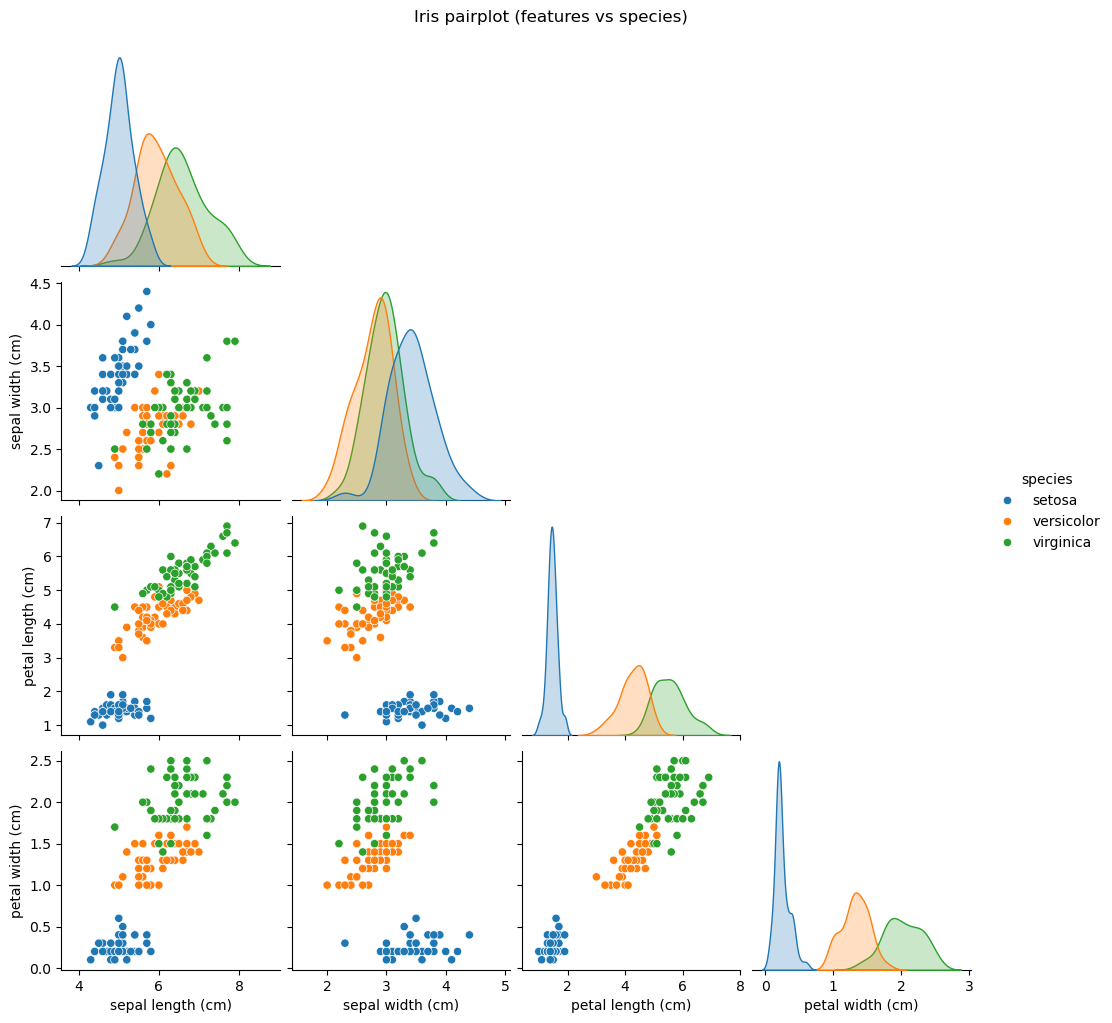

In [50]:
plt.figure(figsize=(8,6))
sns.pairplot(pd.concat([X, y_named], axis=1), hue='species', corner=True)
plt.suptitle("Iris pairplot (features vs species)", y=1.02)
plt.show()

**Interpretation:**  
- *Setosa* is distinctly separated from the other two species based on petal length and width.  
- *Versicolor* and *Virginica* show some overlap but are still separable along the petal dimensions.  
- *Petal-related features* exhibit stronger class discrimination compared to sepal features.


### 9.2 Feature Distributions (Boxplots)  
The boxplot displays the spread, central tendency, and potential outliers for each feature.  
It allows quick comparison of value ranges and variability across sepal and petal measurements.  


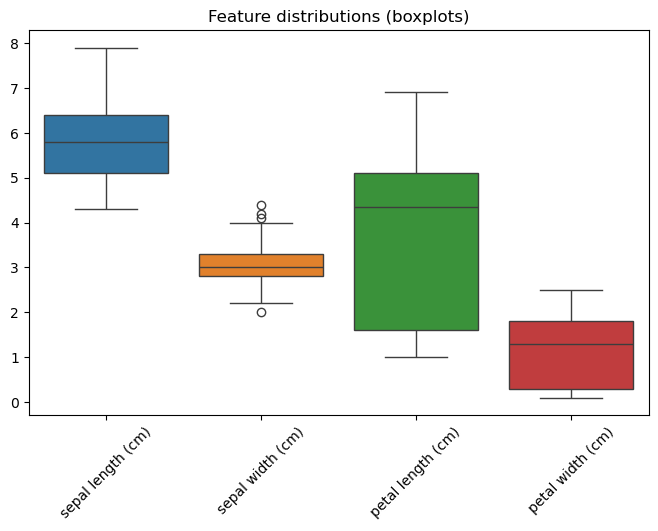

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(data=X)
plt.title("Feature distributions (boxplots)")
plt.xticks(rotation=45)
plt.show()

**Interpretation:**  
- *Sepal width* shows minor outliers and lower variance compared to other features.  
- *Petal length* and *petal width* have a wide range, indicating stronger class differentiation potential.  
- The distribution spread confirms that different features capture varying levels of information about the species.


### 9.3 Feature Correlation (Heatmap)  
The heatmap visualizes correlation coefficients between numerical features.  
Stronger positive or negative correlations indicate potential redundancy or interaction between features.  


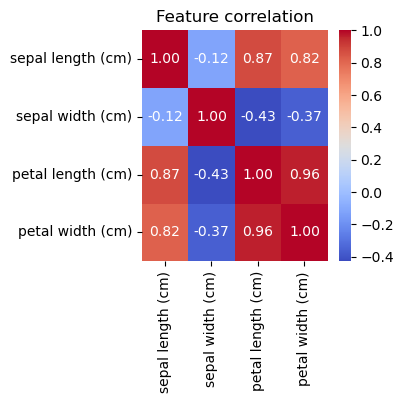

In [56]:
# Correlation heatmap
plt.figure(figsize=(3,3))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature correlation")
plt.show()

**Interpretation:**  
- *Petal length* and *petal width* are highly correlated (0.96), showing they vary together strongly.  
- *Sepal width* has a weak or negative correlation with other features, suggesting it provides unique information.  
- These correlations imply that petal measurements are more predictive for classification tasks.

---

## 10. Model Building and Evaluation  

In this section, a **Random Forest Classifier** was trained and evaluated on the preprocessed Iris dataset.  
Model performance was assessed using accuracy, classification metrics, confusion matrix, and cross-validation to ensure robustness.


### 10.1 Model Initialization  
The **Random Forest Classifier** was initialized with 200 decision trees (`n_estimators=200`) and a fixed random state for reproducibility.  
This ensemble-based algorithm combines multiple trees to improve prediction accuracy and reduce overfitting.


In [61]:
# Build initial model
rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, max_depth=None, n_jobs=-1)
print("Initialized Random Forest Classifier with 200 trees.")

Initialized Random Forest Classifier with 200 trees.


### 10.2 Model Training and Prediction  
The model was trained on the **training set (X_train, y_train)** and used to predict labels on the **test set (X_test)**.  
This step allowed the model to learn the relationship between input features and the target variable.


In [63]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Trained Random Forest model and generated predictions on the test set.")

Trained Random Forest model and generated predictions on the test set.


### 10.3 Model Evaluation  
The model’s performance was evaluated using metrics such as accuracy, precision, recall, F1-score, and a confusion matrix.


In [65]:
# Evaluation
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Random Forest Model:
Accuracy: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.92      0.86        13
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38

Confusion Matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]


**Interpretation:**  
The **Random Forest model** achieved an accuracy of approximately **89.5%**, showing strong performance across all classes.  
It perfectly classified *Setosa* samples, with minor misclassifications between *Versicolor* and *Virginica* — likely due to overlapping petal dimensions.  
Overall, precision, recall, and F1-scores indicate balanced performance, validating that the Random Forest effectively captures nonlinear relationships in the data.


### 10.4 Cross-Validation  
A **5-fold cross-validation** was performed to assess the model’s generalization capability across different subsets of data.  


In [68]:
# Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("5-fold CV accuracy: mean={:.4f}, std={:.4f}".format(cv_scores.mean(), cv_scores.std()))

5-fold CV accuracy: mean=0.9667, std=0.0211



**Interpretation:**  
The high mean accuracy (~96.7%) and low standard deviation confirm that the model is **stable and reliable across folds**.  
This demonstrates that Random Forest provides consistent results and avoids overfitting due to its ensemble averaging mechanism.


---

## 11. SHAP Analysis  

To interpret the **Random Forest model’s predictions**, the **SHAP (SHapley Additive exPlanations)** framework was used.  
SHAP assigns each feature a contribution value that explains how much it influenced the model’s output — providing a transparent, feature-level understanding of decision-making.


In [72]:
# Creating the SHAP explainer for tree-based model
explainer = shap.TreeExplainer(rf)

# Computing SHAP values for the test data
shap_values = explainer.shap_values(X_test)

### 11.1 SHAP Interaction Values Plot  
The SHAP interaction plot displays how **features interact with each other** in influencing model predictions.  
Each point represents an observation, with the x-axis showing the SHAP interaction value (how one feature’s effect changes with another).  


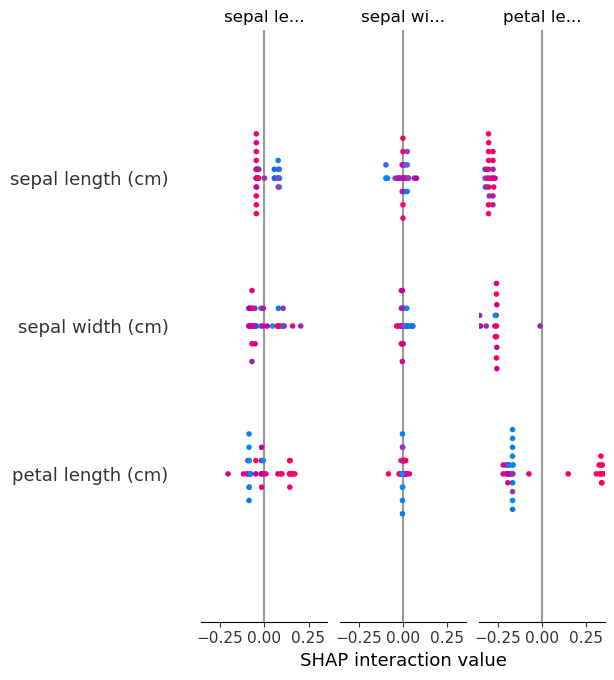

In [74]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)
plt.show()

**Interpretation:**  
The interactions are relatively small, indicating that the Random Forest model makes mostly **independent decisions based on each feature** rather than relying heavily on feature combinations.  
Among all, **petal length** and **petal width** exhibit slight interactive effects, showing that the model sometimes considers their relationship jointly when distinguishing *Versicolor* and *Virginica*.  
Overall, this confirms that feature contributions in the model are mostly additive and stable.


### 11.2 Class-wise SHAP Feature Importance Plot  
This plot shows the **average absolute SHAP value** for each feature, separated by class (Setosa, Versicolor, Virginica).  
It illustrates which features have the highest influence on the prediction of each specific class.


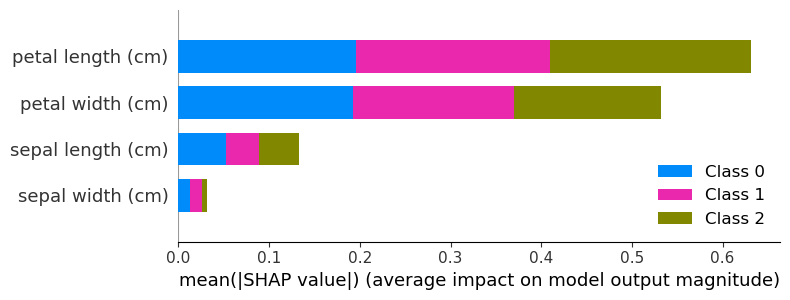

In [77]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)
plt.show()

**Interpretation:**  
For all three classes, **petal length (cm)** and **petal width (cm)** dominate model decision-making, with the strongest impact observed for *Virginica* (Class 2).  
*Setosa* and *Versicolor* show similar trends but with lower SHAP magnitudes, indicating that their separation is easier and more distinct.  
*Sepal features* have minimal contribution across all classes, reaffirming that **petal-based features are the primary discriminators** driving Random Forest classification in the Iris dataset.

### 11.3 Local Explanation (Single Prediction)  

A **local explanation** was generated using SHAP for a single test sample (index 0) to understand how individual feature values contributed to the model’s predicted class.  
The **waterfall plot** below visualizes how each feature pushed the model’s prediction higher or lower relative to the expected value.



Explaining sample index 0:
True label: setosa
Predicted label: setosa


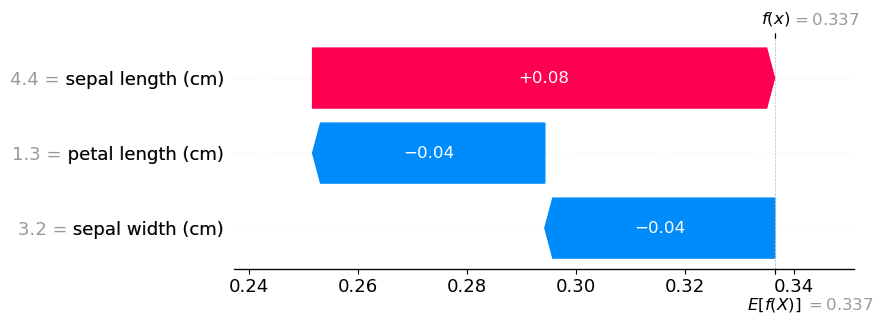

In [80]:
sample_idx = 0
sample = X_test.iloc[[sample_idx]]
true_label = y_test.iloc[sample_idx]
pred_label = rf.predict(sample)[0]

print(f"\nExplaining sample index {sample_idx}:")
print(f"True label: {iris.target_names[true_label]}")
print(f"Predicted label: {iris.target_names[pred_label]}")

# Force / Waterfall plot (class = predicted class)
shap.initjs()
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[pred_label][sample_idx],
        base_values=explainer.expected_value[pred_label],
        data=sample.values[0],
        feature_names=X_test.columns
    )
)
plt.show()

**Interpretation:**  
The model correctly predicted the class as **Setosa**, with an overall prediction probability of **0.337** for this class.  
- **Sepal length (cm)** contributed positively (+0.08), slightly increasing the confidence toward Setosa.  
- **Petal length (cm)** and **sepal width (cm)** contributed negatively (−0.04 each), but not enough to alter the prediction.  
This indicates that the sample’s relatively **short petal length** and **moderate sepal width** align strongly with the characteristics of the *Setosa* class, supporting the model’s correct classification.

Overall, the local SHAP analysis confirms that the Random Forest model bases its individual predictions on feature patterns consistent with biological distinctions between Iris species.

---

## 14. Model Saving for Deployment  

After training and evaluation, the final step is to **save the model and preprocessing objects** for future use.  
This allows the trained model to be **deployed or reused** without needing to retrain it every time.


In [84]:
joblib.dump(rf, "iris_random_forest_model.pkl")

print('Model saved successfully for deployment.')

Model saved successfully for deployment.


---

## 15. Results and Insights  

The **Random Forest Classifier** performed effectively on the Iris dataset, demonstrating strong predictive power and interpretability through SHAP analysis.  
Comprehensive data exploration, preprocessing, and evaluation provided a clear understanding of how the model differentiates between the three Iris species — *Setosa*, *Versicolor*, and *Virginica*.

**Model Performance:**  
- Achieved an **accuracy of approximately 89.5%** on the test set and **96.7% mean accuracy** in 5-fold cross-validation, indicating excellent generalization.  
- The **classification report** and **confusion matrix** show near-perfect performance on *Setosa*, with minor misclassifications between *Versicolor* and *Virginica* — expected due to overlapping petal measurements.

**SHAP Explainability Insights:**  
- **Petal length (cm)** and **petal width (cm)** emerged as the most influential features in determining species classification.  
- **Sepal measurements** contributed less but still aided in minor class distinctions.  
- SHAP summary and bar plots confirmed that the model’s decisions are consistent and biologically logical — longer petals and wider petal widths strongly indicate *Virginica*, while shorter ones indicate *Setosa*.  
- The **local explanation (waterfall plot)** validated that feature contributions align with expected biological patterns, confirming model reliability and transparency.

**Key Takeaways:**  
- Random Forest provided a robust, interpretable, and accurate model for classifying Iris species.  
- SHAP enhanced understanding by offering both **global** and **local** explanations of model predictions.  
- The results highlight how explainable AI techniques can bridge the gap between model accuracy and interpretability — ensuring trust in data-driven decision-making.


---

## 16. References  

- Lundberg, S.M., & Lee, S.-I. (2017). *A Unified Approach to Interpreting Model Predictions.*  
  Advances in Neural Information Processing Systems (NIPS), 30.  
  https://shap.readthedocs.io/en/latest/
